In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

## Find the correlation between parameters

In [3]:
train_corr = train.corr()


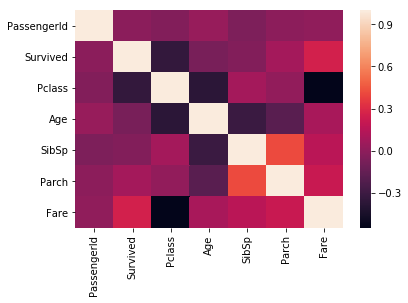

In [4]:

sns.heatmap(train_corr)


In [5]:
# observe the columns
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_y = train["Survived"]
train_X = train.drop(["Survived","Name", "Ticket","Embarked","Cabin"],axis=1)

In [7]:
train_X = train_X.fillna(train.mean())


In [8]:
train_X = pd.get_dummies(train_X)

In [9]:
train_X.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male'],
      dtype='object')

In [10]:
rig = RidgeClassifier()


In [11]:
rig.fit(train_X,train_y)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [12]:

test_X = test.drop(["Name", "Ticket","Embarked","Cabin"],axis=1)
test_X = test_X.fillna(train.mean())
test_X = pd.get_dummies(test_X)

In [13]:
test_X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,892,3,34.5,0,0,7.8292,0,1
1,893,3,47.0,1,0,7.0000,1,0
2,894,2,62.0,0,0,9.6875,0,1
3,895,3,27.0,0,0,8.6625,0,1
4,896,3,22.0,1,1,12.2875,1,0


In [14]:
a = rig.predict(test_X)

In [15]:
df = test["PassengerId"].to_frame()

In [16]:
df["Survived"] = a

In [18]:
len(df)

418

In [19]:
df.to_csv("output.csv",index=False)